In [7]:
!pip install photutils #only needed if its being run on colabs
import numpy as np
from astropy.modeling.models import Gaussian2D
from photutils.datasets import make_noise_image
import matplotlib.pyplot as plt
from photutils.isophote import EllipseGeometry
from photutils.aperture import EllipticalAperture

#We will simulate a nebula-like image to do surface photometry

In [3]:
g = Gaussian2D(100.0, 75, 75, 20, 12, theta=40.0 * np.pi / 180.0)
ny = nx = 150
y, x = np.mgrid[0:ny, 0:nx]
noise = make_noise_image((ny, nx), distribution='gaussian', mean=0.0,
                         stddev=2.0, seed=1234)
data = g(x, y) + noise

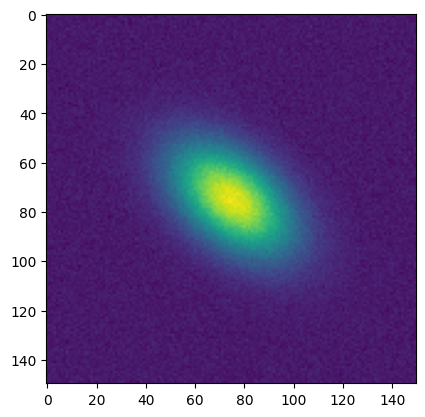

In [6]:
plt.imshow(data)

#This method works by fitting isophotes to the image.

(<matplotlib.patches.Ellipse at 0x7f647a00a770>,)

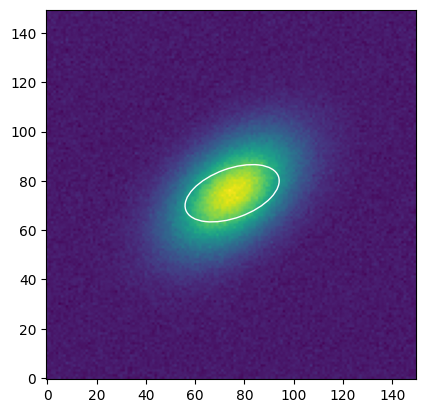

In [8]:
geometry = EllipseGeometry(x0=75, y0=75, sma=20, eps=0.5, pa=20.0 * np.pi / 180.0) #give an initial guess for the isophote
aper = EllipticalAperture((geometry.x0, geometry.y0), geometry.sma, geometry.sma * (1 - geometry.eps), geometry.pa)
plt.imshow(data, origin='lower')
aper.plot(color='white')

#We can now run the fit

In [10]:
from photutils.isophote import Ellipse
ellipse = Ellipse(data, geometry)
isolist = ellipse.fit_image() #this returns a list of the fitted isophotes. you can check everything thats returned by looking at the IsophoteList object documentation
print(isolist.to_table())

       sma               intens            intens_err      ... nflag niter stop_code
                                                           ...                      
------------------ ------------------ -------------------- ... ----- ----- ---------
               0.0  103.3660741932861                  0.0 ...     0     0         0
0.5346972612827552 101.85768930454661 0.030160181107668268 ...     0    10         0
0.5881669874110307 101.68151143393658 0.028309622593685645 ...     0    10         0
0.6469836861521338   101.505670787118 0.025866912481304023 ...     0    11         0
0.7116820547673471   101.372109520222  0.03225393307834451 ...     0    10         0
0.7828502602440819 101.18631230115908   0.0361583334561795 ...     0    10         0
0.8611352862684901 100.96908841886025  0.03258843615160212 ...     0    10         0
0.9472488148953392 100.78891350007841 0.049768537796437626 ...     0    10         0
1.0419736963848731 100.42647733875044  0.08087063557978552 ...   

##Example of plots



Text(0, 0.5, 'Intensity')

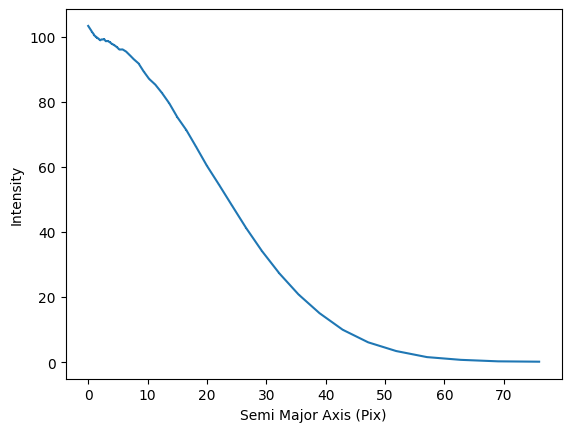

In [13]:
plt.errorbar(isolist.sma,isolist.intens,yerr=isolist.int_err)
plt.xlabel("Semi Major Axis (Pix)")
plt.ylabel("Intensity")

#Plot some of the fitted isophotes

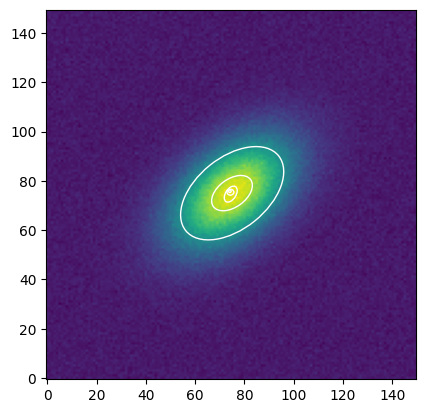

In [21]:
plt.imshow(data, origin='lower')
for i in range(5):
  aper = EllipticalAperture((isolist.x0[i*10+1], isolist.y0[i*10+1]), isolist.sma[i*10+1], isolist.sma[i*10+1] * (1 - isolist.eps[i*10+1]), isolist.pa[i*10+1])
  aper.plot(color='white')

#Building a Model Image

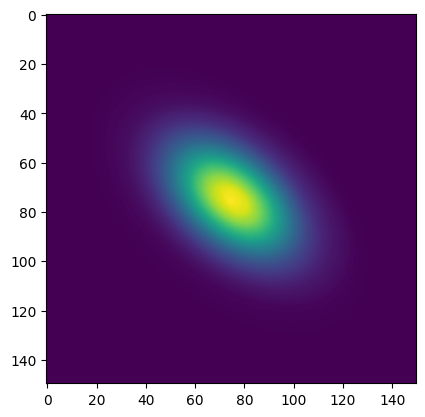

In [22]:
from photutils.isophote import build_ellipse_model
model_image = build_ellipse_model(data.shape, isolist)
plt.imshow(model_image)

In [ ]:
#Plot the residual
residual = data - model_image
plt.imshow(re)